In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

import os
from distutils.dir_util import copy_tree, remove_tree

from PIL import Image
from random import randint

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef as MCC
from sklearn.metrics import balanced_accuracy_score as BAS
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from keras.utils.vis_utils import plot_model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Convolution2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, MaxPooling2D
from keras.applications.vgg16 import preprocess_input

In [ ]:
#default_dir = "/content/drive/MyDrive/AI Data/Alzheimers Dataset/"
#root_dir = "./"
#test_dir = default_dir + "test/"
#train_dir = default_dir + "train/"
#work_dir = root_dir + "dataset/"
#if os.path.exists(work_dir):
#    remove_tree(work_dir)
#os.mkdir(work_dir)
#copy_tree(train_dir, work_dir)
#copy_tree(test_dir, work_dir)
#print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['NonDemented', 'ModerateDemented', 'VeryMildDemented', 'MildDemented']


In [2]:
WORK_DIR = '/content/drive/MyDrive/AI Data/Alzheimers_Dataset/'

CLASSES = [ 'NonDemented',
            'VeryMildDemented',
            'MildDemented',
            'ModerateDemented']

In [3]:
IMG_SIZE = 176
IMAGE_SIZE = [176, 176]
DIM = (IMG_SIZE, IMG_SIZE)
ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

work_dr = IDG(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM, data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)

train_data_gen = work_dr.flow_from_directory(directory=WORK_DIR, target_size=DIM, batch_size=6410, shuffle=False)

Found 6410 images belonging to 4 classes.


In [4]:
train_data, train_labels = train_data_gen.next()

In [5]:
#Getting to know the dimensions of our dataset

print(train_data.shape, train_labels.shape)

(6410, 176, 176, 3) (6410, 4)


In [ ]:
#sm = SMOTE(random_state=42)

#train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

#train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

#print(train_data.shape, train_labels.shape)

In [6]:
#Splitting data to data train, data test, and data validation sets

#train_data, test_data, train_labels, test_labels = train_test_split(train_data, train_labels, test_size = 0.3, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size = 0.25, random_state=42)

In [7]:
#step1 Initializing CNN
model = Sequential()
# step2 adding 1st Convolution layer and Pooling layer
model.add(Convolution2D(32,(3,3),input_shape = (176,176,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

# step3 adding 2nd convolution layer and pooling layer
model.add(Convolution2D(32,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

#step4 Flattening the layers
model.add(Flatten())

#step5 Full_Connection
model.add(Dense(units=128,activation = 'relu'))
model.add(Dense(units=256,activation = 'relu'))
model.add(Dense(units=512,activation = 'relu'))
model.add(Dense(units=4,activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 174, 174, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 87, 87, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 42, 42, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 56448)             0         
                                                                 
 dense (Dense)               (None, 128)               7

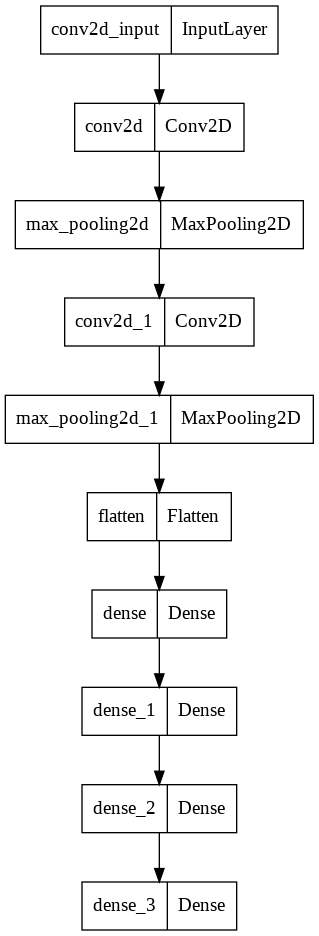

In [9]:
# plot the model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [10]:
#step6 Compiling CNN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

#step7 Fitting CNN to images

print("\nTraining the data...\n")

model.fit(train_data, train_labels, validation_data = (val_data, val_labels), epochs = 100)


Training the data...

Epoch 1/100
151/151 [==============================] - 15s 35ms/step - loss: 1.0178 - accuracy: 0.5084 - val_loss: 0.9607 - val_accuracy: 0.5340
Epoch 2/100
151/151 [==============================] - 5s 33ms/step - loss: 0.8614 - accuracy: 0.5846 - val_loss: 0.9412 - val_accuracy: 0.5427
Epoch 3/100
151/151 [==============================] - 4s 29ms/step - loss: 0.6587 - accuracy: 0.7083 - val_loss: 0.6450 - val_accuracy: 0.7155
Epoch 4/100
151/151 [==============================] - 4s 29ms/step - loss: 0.3976 - accuracy: 0.8354 - val_loss: 0.5541 - val_accuracy: 0.7854
Epoch 5/100
151/151 [==============================] - 4s 29ms/step - loss: 0.2458 - accuracy: 0.9108 - val_loss: 0.4353 - val_accuracy: 0.8559
Epoch 6/100
151/151 [==============================] - 4s 29ms/step - loss: 0.1139 - accuracy: 0.9538 - val_loss: 0.5166 - val_accuracy: 0.8490
Epoch 7/100
151/151 [==============================] - 4s 29ms/step - loss: 0.0524 - accuracy: 0.9819 - val_loss

In [11]:
test_scores = model.evaluate(val_data, val_labels)

print("Test Accuracy: %.2f%%"%(test_scores[1] * 100))

51/51 [==============================] - 1s 14ms/step - loss: 0.8723 - accuracy: 0.9239
Test Accuracy: 92.39%


In [ ]:
#pred_labels = model.predict(test_data)

In [12]:
model.save('CNN_model.h5')

In [ ]:
from keras.preprocessing import image
img_path = '/content/drive/MyDrive/AI Data/Alzheimers_Dataset/test/MildDemented/27.jpg'
label = [ 'ModerateDemented', 'NonDemented', 'VeryMildDemented', 'MildDemented']
img = image.load_img(img_path, target_size=(176, 176))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
features = model.predict(x)
thresholded = (features>0.5)*1
ind = np.argmax(thresholded)
print('Predicted Array:',thresholded)
print('Predicted Label:',label[ind])

Predicted Array: [[0 0 0 1]]
Predicted Label: VeryMildDemented
